# COGS 118A - Final Project

# BasketbAll-Stars

## Group members

- Kyle Moore | kcm004@ucsd.edu 
- Sebastian Balica | sbalica@ucsd.edu 
- Javon Maxie | jmaxie@ucsd.edu 
- Sam Woo | sdwoo@ucsd.edu 

# Abstract 

We will use regular season statistics of NBA players from [basketball reference](https://www.basketball-reference.com/) to predict voting results for All NBA awards. All NBA awards are highly prestigious and directly impact how much money a player can earn, as well as the betting market surrounding awards. The data will be cleaned using minute and year restrictions, and labeling whether or not a player was All NBA. Modeling will be performed with various classification methods from python’s sklearn: k nearest neighbors, support vector machines, and random forest; to determine the best prediction accuracy as well as the most impactful statistics(feature selection) a player can have. We will determine success through the classification reports including the F-Scores of each classification model due it being one of the better assessors when using imbalanced data, such as 15 All NBA players vs ~500 total players per year.

# Background

The All-NBA Team is an honor given to 15 players at the end of the each season. Media members vote on the league's best players and defenders, with two guards, two forwards, and one center picked for each team. This recognition, and voting process has been happening since 1956, with experts and sports enthusiasts making predictions on which players will make the All-NBA Team based on their statistics in the previous season. Sports predictions will take into consideration the average points, rebounds, assists, steals, and blocks per game for every player, in determining who has the highest chance of being awarded. Despite these strong predictions, how the selections are made has been a matter of controversy. Currently players are chosen according to positions, however this becomes a problem when players are considered multi-positional<a name="golliver"></a>[<sup>[1]</sup>](#gollivernote) or, for example, the two best players in the league are centers. One of these players will be bumped down to the second team despite being a top five player in the NBA. Using machine learning and player data, it can be decided which players really deserve to be on the All-NBA Team regardless of position. 

There have been lots of models, both personal and professional, that have been created to help predict anything that can happen in sports. While some of this is fan and "stathead" related, it also coincides with sports betting doubling in 2021<a name="marquardt"></a>[<sup>[2]</sup>](#marquardtnote) and the desire to gain an edge. Being able to predict sports through statistics can also be lucrative for finding talent, such as the famous "moneyball" scenario of the Oakland A's. Data analytics have also completely changed the way that games are played, coached, and practiced<a name="cohen"></a>[<sup>[3]</sup>](#cohennote). There have been previous attempts at using both classification and linear regression to predict NBA awards such as most valuable player(MVP), offensive and defensive players of the year(OPOY,DPOY), rookie of the year(ROY), and even whether or not someone will be inducted into the Hall of Fame.

One article details the use of regression to predict the MVP by considering "MVP share" as a numerical target<a name="yoo"></a>[<sup>[4]</sup>](#yoonote). They used the same dataset that we used in addition to their MVP voting data, and also linked to a [web scraper](https://github.com/jaebradley/basketball_reference_web_scraper). Yoo was able to acheive an accuracy of ~.83 using an XGBoost Regressor. We won't be able to use regression due to our problem being a classification problem, whether someone is on the All NBA team or not. 

Albert et al.<a name="albert"></a>[<sup>[5]</sup>](#albertnote) used Adaboost, random forest, and multilayer perceptron classifications to predict All Star results as opposed to All NBA. They were able to achieve an accuracy ~.9. They did do a preliminary, 40-fold cross-validation sensitivity test that included other models: SVC, k-nearest neighbor, decision tree, gaussian process; but it was determined that RF, Adaboost, and MLP were the best to move forward with. We will be using one model that they chose, RF, and two models they did not, SVC and KNN. 

Since we are planning on predicting only whether or not a player makes All NBA as ooposed to whether they make 1st, 2nd, or 3rd team, we are hoping to achieve similar results to the projects above. A logical future step would be to predict position voted for and which team they made. We feel that All NBA is less studied yet very important due to its impact on player salaries, such as Celtic's Jayson Tatum losing out on $32.6 million due to missing All NBA<a name="darren"></a>[<sup>[6]</sup>](#darrennote), as well as their overall legacy. Being able to predict these results could also help determine future salary cap considerations, trade values, betting before the lines change, and knowledge of which skills are most important for consideration.

# Problem Statement

Predicting whether a player will make or not make an All NBA team using their regular season statistics. Regular season statistics include points, assists, ft%, etc. and are very quantifiable due to the nature of sport statistics. The All NBA results will be the class labels (0/1). There are many machine learning classification options that can be applied and tuned to this problem (we will use KNN/SVM/RF/Logistic Regression). We can test the accuracy on test seasons after creating the models on training seasons. Due to the annual nature of the NBA, this problem is repeatable and the model will be applicable to future seasons. 

# Data


- Link to data
    - [Web Scraping and Data Cleaning Notebook](web_scraper_and_cleaning.ipynb)
    - Obtained from https://www.basketball-reference.com/
- Size of the data
    - After cleaning and merging the shape is (11586, 30), 30 variables with 11,586 observations
- Each observation contains:
    - A Player's stats for a single season
    - With variables:
        - 'Pos'
            - Position
        - 'Age'
            - Age
        - 'Tm'
            - Team
        - 'G'
            - Games played
        - 'GS'
            - Games started
        - 'MP'
            - Minutes played per game
        - 'FG'
            - Field goals made per game
        - 'FGA'
            - Fiedl goals attempted per game
        - 'FG%'
            - Field goal percentage
        - '3P'
            - 3 pointers made per game
        - '3PA'
            - 3 pointers attempted per game
        - '3P%'
            - 3 point percentage
        - '2P'
            - 2 pointers made per game
        - '2PA'
            - 2 pointers attempted per game
        - '2P%'
            - 2 point percentage
        - 'eFG%'
            - (2pt FGM + 1.5*3pt FGM) / FGA
            - Effective field goal percentage, includes value of a 3 vs a 2 pointer
        - 'FT'
            - Free throws made per game
        - 'FTA'
            - Free throws attempted per game
        - 'FT%'
            - Free throw percentage
        - 'ORB'
            - Offensive rebound per game
        - 'DRB'
            - Defensive rebound per game
        - 'TRB'
            - Total rebounds per game
        - 'AST'
            - Assists per game
        - 'STL'
            - Steals per game
        - 'BLK'
            - Blocks per game
        - 'TOV'
            - Turnovers per game
        - 'PF'
            - Personal fouls per game
        - 'PTS'
            - Points per game
        - 'Year'
            - Year the season ended in
        - 'all_nba_team'
            - All NBA team results
- Critical variables
    - Because All NBA takes into account a players entire seasons performance, all of these statistics are important for determining voting results. After some initial testing we will determine most important features based on correlation and predictive power.
- Handling, transformations, cleaning, etc:
    - Gathering, cleaning, and transformations also in notebook linked above.
    - General steps taken:
        - Use BeautifulSoup to scrape yearly stats from basketball-reference.com and download their All NBA results csv
        - Clean both player stats and All NBA results dataframes
        - Merge dataframes together for use in modeling

In [1]:
# import all necessary packages and formulas

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn import svm

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import *

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
# Run our notebook to generate the dataframe

%run web_scraper_and_cleaning.ipynb

[Link to Web Scraping and Data Cleaning Notebook](web_scraper_and_cleaning.ipynb)

In [3]:
# Assign dataframe to the merged dataframe created in the web scraping notebook

df = merged_df

In [4]:
print('The shape of the dataframe is:', df.shape)
print('The columns of the dataframe are: \n', [x for x in df.columns])

The shape of the dataframe is: (11586, 30)
The columns of the dataframe are: 
 ['Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year', 'all_nba_team']


In [5]:
# create column of class labels, 1 for All NBA, 0 for not

df['all_nba'] = np.where(df['all_nba_team'] >= 1, 1, 0)

# Proposed Solution

Our soultion to our problem statement is to train a model on a set of various basketball statistics from players that have made All NBA in the past. We will use stats from players from 1989-1900 season all the way to the 2020-2021 season. The reason we will not used stats from before 1989 is because there were only 2 All NBA teams selected. After 1989 the league started selecting three All NBA teams. Using libraries such as pandas, numpy, and scikit learn, we would like to test various models on our set of basketball statistics in order to get a preditiction of whether or not a player should make All NBA team or not. Some of the models we are planning to test our solution on are logistic regression, random forest, KNN, and SVM to start. Using model selection we will be able to see how the different models we use on our data stack up against one another. From there we will be able to determine which model performs the best.  The solution to our model will be reproducible because as more and more NBA season happen we will be able to not only makes predictions on who should make All NBA, but also add the stats for the players that do make All NBA teams in the future to make our model stronger. 

# Evaluation Metrics

One way we will evaluate the success of our models will be through the use of an accuracy score from the sklearn library. This will allows us to gauge how well our models are peforming when it comes to the predicting whether or not a player meets the criteria to be selected to an All NBA team. Another way we will evaluate the success of our models is by looking at there precision and recall, as well as ROC AUC scores which will help us see how the models handle the class imbalance. Using those scores we can also go ahead and calculate the F1-scores for each model to really solidify our idea of which model performs the best. F score is a great metric for imbalanced classes such as ours. In order to look at our models on the variable scale and see how each player statistic effects the overall model, we will be using sklearn's classification report. Theses reports will allow us to see the precision and recall scores for each variable in the training set of our models. From here we may be able to derive new models and drop certain player statistics from our training set that are holding our models back with low scores to see if we can improve the overall accuracy of our models.  

# Results

## EDA

In [6]:
all_nba_true = ['Nikola Jokić','Giannis Antetokounmpo','Jayson Tatum','Luka Dončić','Devin Booker',
                'Joel Embiid','Kevin Duran','DeMar DeRoza','Ja Morant','Stephen Curry',
                'Karl-Anthony Towns','LeBron James','Pascal Siakam','Chris Paul','Trae Young']

In [7]:
# add a points per game column
df['PTS/G'] = (df.PTS / df.G).round(decimals=1)

In [8]:
# gather numeric columns

numeric_columns = ['Age', 'G', 'GS', 'MP', 'FG', '3P', 'eFG%', 'FT', 'TRB', 'AST', 
                   'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PTS/G', 'all_nba']

<AxesSubplot:>

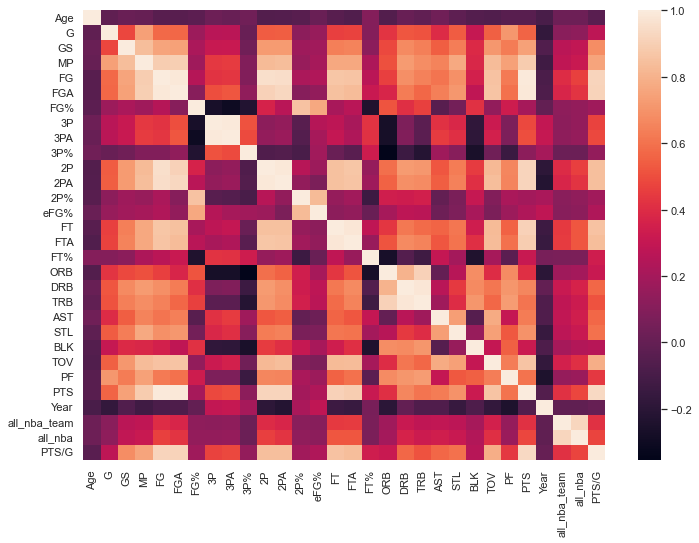

In [9]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df.corr())

### Feature Subset Using Domain Knowledge

We can see that there is redundant data and some unnecessary substats. We can remove some of this redundancy as well as look into regularization in our models to prevent complexity.

- Total rebounds(TRB) can be kept allowing us to remove the offensive and defensive subcategories
    - There is a defensive All NBA team where DRB might be more important but is not as relevant for our use case.
- Effective field goal percentage (eFG%) is a better measure and a combination of 2P% and 3P% based on their values
- Attempts aren't needed because that will be encompassed in shots made for FG and 3P in combination with eFG%
- Free throws made (FT) is also able to cover the volume of the FT categories according to the correlation plot
- The way the game is played has changed considerably over the years so subestting the years into eras might be necessary to better predict current voting and playing trends

In [10]:
df = df.drop(['FGA', 'FG%', '3PA', '3P%', '2P', '2PA', '2P%', 'FT%', 'FTA', 'ORB', 'DRB'], axis=1)

At a quick glance it appears that FG, FT, TOV, PTS, and PTS/G have the highest correlation with all_nba. Turnovers is interesting because it is a negative statistic and is possibly due to top players having high usage and therefore more likely to be involved in turnovers. Plotting the distributions along with some descriptive statistics below will help.

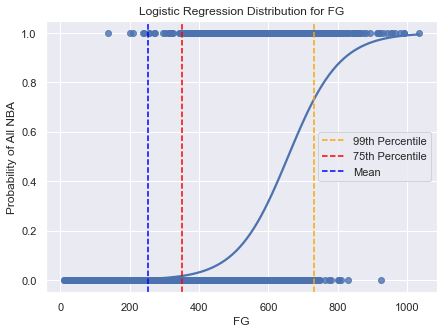

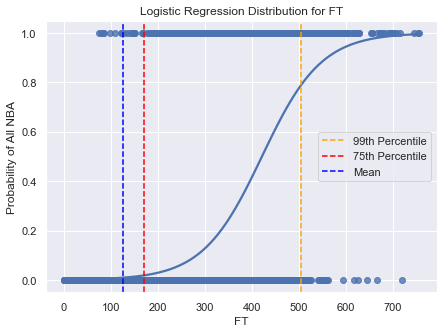

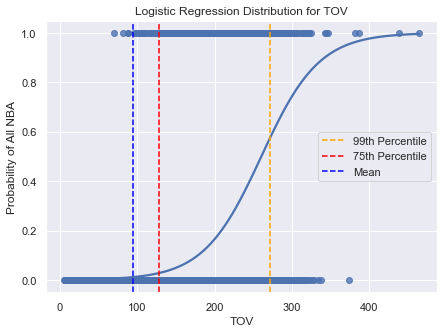

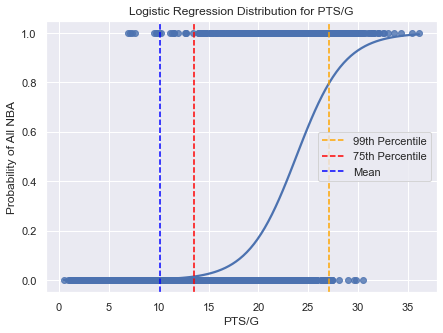

In [11]:
corr_stats = ['FG', 'FT', 'TOV', 'PTS/G']

sns.set(rc={'figure.figsize':(7,5)})

for stat in corr_stats:
    plt.figure()
    sns.regplot(stat, 'all_nba', data=df, logistic=True, ci=None).set(title='Logistic Regression Distribution for ' + stat,
                                                                      ylabel = 'Probability of All NBA')
    plt.axvline(df[stat].quantile(.99), color='orange', ls='--', label = '99th Percentile')
    plt.axvline(df[stat].quantile(.75), color='red', ls='--', label = '75th Percentile')
    plt.axvline(df[stat].mean(), color='blue', ls='--', label = 'Mean')
    plt.legend()

Plotting the scatter plots along with the probabilities for the stats that appear highly correlated shows that even when you are a player in the 99th percentile you only have an 80% probability of making the All NBA, showing its exclusivity. We can also see that having high turnovers isn't necessarily increasing the probability of being voted All NBA even though it has correlation.

We can see that most of our All NBA team players are at least over the mean. Since defense can also get you onto All NBA as well as overall scoring increasing with time, it makes sense that many players would still make the cut with lower scoring.

Because it is a voting result where many top players will be similar statistically, using probabilities will make the results more accurate and more interpretable than hard classification, but both will be checked.

## Baseline Classification

In [12]:
# Split dataset

X_train, X_test, y_train, y_test = train_test_split(df[numeric_columns].drop(columns='all_nba')[df.Year != 2022], 
                                                    df.all_nba[df.Year != 2022], 
    test_size=.33, random_state=42, stratify=df.all_nba[df.Year != 2022])

In [13]:
print('The shape of the X_train is:', X_train.shape)
print('The shape of the X_test is:', X_test.shape)
print('The shape of the y_train is:', y_train.shape)
print('The shape of the y_test is:', y_test.shape)

The shape of the X_train is: (7495, 16)
The shape of the X_test is: (3693, 16)
The shape of the y_train is: (7495,)
The shape of the y_test is: (3693,)


In [14]:
# dummy classifiers

dummy_clf = DummyClassifier(strategy='most_frequent').fit(df[numeric_columns].drop(columns='all_nba')[df.Year != 2022],
                                                          df.all_nba[df.Year != 2022])
stratified_dummy_clf = DummyClassifier(strategy='stratified').fit(df[numeric_columns].drop(columns='all_nba')[df.Year != 2022],
                                                          df.all_nba[df.Year != 2022])

In [15]:
dummy_clf.fit(X_train, y_train)
stratified_dummy_clf.fit(X_train, y_train)

DummyClassifier(strategy='stratified')

In [16]:
print('Most frequent class guessing in baseline gives: ' + str(dummy_clf.score(X_test, y_test)))
print('Stratified class guessing in baseline gives: ' + str(stratified_dummy_clf.score(X_test, y_test)))

Most frequent class guessing in baseline gives: 0.9558624424587057
Stratified class guessing in baseline gives: 0.9206607094503114


Because of our imbalanced classes where only 15 players a year are in class 1, using a dummy classifier to guess class 0 every time gives us a 95.6% accuracy score and stratifying based on class rations in the training set gives us a 91.3% accuracy score. We will use these as our targets to beat for our models when predicting the 2022 All NBA results.

We must remember that accuracy score is not a good metric for our endgoal. Getting most of the players correct is the most important aspect of our model, a good model will be over 95.6% base accuracy though so it is an important check.

## Single Classifier Grid Searches and Results

[Model selection notebook](model_selection.ipynb)

In the above notebook, we tried different classifiers: random forest, support vector, logistic regression, and k-nearest neighbors; before attempting to do a mutliclass grid search to better understand the effects of their hyperparamaters and to see their differences in performance.

KNN performs the worst but still decently. The other classifiers all have similar performances and leave out and include similar players. The use of probabilities allows us to better see how our models are predicting.

## Multiple Classifier Grid Search

In [17]:
# estimators for grid search

rf_clf = RandomForestClassifier(random_state=42)
sv_clf = svm.SVC(probability=True, random_state=42)
log_clf = LogisticRegression(random_state=42)
knn_clf = KNeighborsClassifier()

In [18]:
# Initiaze the hyperparameters for each dictionary


rf_param = {}
rf_param['classifier__n_estimators'] = [10, 50, 100, 250, 500]
rf_param['classifier__max_depth'] = [5, 10, 20]
rf_param['classifier__max_features'] = ['auto', 'sqrt', 'log2']
rf_param['classifier__class_weight'] = [None, 'balanced', {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
rf_param['classifier'] = [rf_clf]

sv_param = {}
sv_param['classifier__C'] = np.logspace(-2, 2, 5)
sv_param['classifier__class_weight'] = [None, 'balanced', {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
sv_param['classifier__gamma'] = np.logspace(-2, 2, 5)
sv_param['classifier__kernel'] = ['linear', 'rbf']
sv_param['classifier'] = [sv_clf]

log_param = {}
log_param['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
log_param['classifier__penalty'] = ['none', 'l2']
log_param['classifier__class_weight'] = [None, 'balanced', {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
log_param['classifier'] = [log_clf]

knn_param = {}
knn_param['classifier__n_neighbors'] = list(range(1, 31,2))
knn_param['classifier'] = [knn_clf]

In [19]:
pipeline = Pipeline([('scaler', StandardScaler()), ('classifier', rf_clf)])
params = [rf_param, knn_param, sv_param, log_param]

In [20]:
%%time

# Train the grid search model
gs = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, scoring='f1_micro', verbose=3).fit(X_train, y_train)

Fitting 3 folds for each of 540 candidates, totalling 1620 fits
Wall time: 6min 30s


In [21]:
gs.best_params_

{'classifier': LogisticRegression(C=1, random_state=42),
 'classifier__C': 1,
 'classifier__class_weight': None,
 'classifier__penalty': 'l2'}

In [22]:
gs.best_score_

0.9763842553301011

In [23]:
# Test set metric scores

print("Precision:",precision_score(gs.predict(X_test), y_test))
print("Recall:",recall_score(gs.predict(X_test), y_test))
print("ROC AUC Score:",roc_auc_score(gs.predict(X_test), y_test))

Precision: 0.6073619631901841
Recall: 0.8319327731092437
ROC AUC Score: 0.9070128331130999


In [24]:
# New dataframe containing only 2022

df_2022 = df[df['Year']==2022]

In [25]:
df_2022['all_nba_pred'] = gs.predict(df_2022[numeric_columns].drop(columns='all_nba'))

df_2022[df_2022['all_nba_pred'] == 1][['all_nba', 'all_nba_pred']].head(30)

,all_nba,all_nba_pred
Player,,
Giannis Antetokounmpo,1,1
Jimmy Butler,0,1
Stephen Curry,1,1
DeMar DeRozan,1,1
Luka Dončić,1,1
Kevin Durant,1,1
Joel Embiid,1,1
Rudy Gobert,0,1
James Harden,0,1


In [26]:
df_2022['all_nba_prob'] = gs.predict_proba(df_2022[numeric_columns].drop(columns='all_nba'))[:,1]

df_2022[['all_nba', 'all_nba_pred', 'all_nba_prob']].sort_values('all_nba_prob', ascending = False).head(20)

,all_nba,all_nba_pred,all_nba_prob
Player,,,
Nikola Jokić,1,1,0.998992
Giannis Antetokounmpo,1,1,0.997481
Joel Embiid,1,1,0.996834
LeBron James,1,1,0.985448
Kevin Durant,1,1,0.973960
Trae Young,1,1,0.954173
Luka Dončić,1,1,0.937541
DeMar DeRozan,1,1,0.918279
Rudy Gobert,0,1,0.901379


## Era Adjustment

In [30]:
# Split dataset using more recent seasons

X_train, X_test, y_train, y_test = train_test_split(df[numeric_columns].drop(columns='all_nba')[(df.Year > 2000) & (df.Year < 2022)], 
                                                    df.all_nba[(df.Year > 2000) & (df.Year < 2022)], 
    test_size=.33, random_state=42, stratify=df.all_nba[(df.Year > 2000) & (df.Year < 2022)])

In [31]:
LogisticRegression(C=1, class_weight = None, penalty = 'l2', random_state=42)

pipe = pipeline = Pipeline([('scaler', StandardScaler()), 
                            ('logistic', LogisticRegression(C=1, class_weight = None, penalty = 'l2', random_state=42))])

In [32]:
era_log = pipe.fit(X_train, y_train)

In [35]:
# Test set metric scores

print("Precision:",precision_score(era_log.predict(X_test), y_test))
print("Recall:",recall_score(era_log.predict(X_test), y_test))
print("ROC AUC Score:",roc_auc_score(era_log.predict(X_test), y_test))

Precision: 0.6442307692307693
Recall: 0.7444444444444445
ROC AUC Score: 0.8644556395186118


In [36]:
# New dataframe containing only 2022

df_2022 = df[df['Year']==2022]

In [37]:
df_2022['all_nba_pred'] = era_log.predict(df_2022[numeric_columns].drop(columns='all_nba'))

df_2022[df_2022['all_nba_pred'] == 1][['all_nba', 'all_nba_pred']].head(30)

,all_nba,all_nba_pred
Player,,
Giannis Antetokounmpo,1,1
Jimmy Butler,0,1
Stephen Curry,1,1
DeMar DeRozan,1,1
Luka Dončić,1,1
Kevin Durant,1,1
Joel Embiid,1,1
Rudy Gobert,0,1
James Harden,0,1


In [38]:
df_2022['all_nba_prob'] = era_log.predict_proba(df_2022[numeric_columns].drop(columns='all_nba'))[:,1]

df_2022[['all_nba', 'all_nba_pred', 'all_nba_prob']].sort_values('all_nba_prob', ascending = False).head(20)

,all_nba,all_nba_pred,all_nba_prob
Player,,,
Nikola Jokić,1,1,0.998077
Giannis Antetokounmpo,1,1,0.997704
Joel Embiid,1,1,0.996961
LeBron James,1,1,0.965794
Kevin Durant,1,1,0.958897
Trae Young,1,1,0.955925
DeMar DeRozan,1,1,0.946684
Rudy Gobert,0,1,0.886563
James Harden,0,1,0.872257


Choosing the 2000 season as an arbitrary cutoff yielded similar results as the more inclusive model. Using even more recent seasons might show a slightly better increase in prediction, especially considering the more recent focus on scoring over defense for All NBA.

# Discussion

### Interpreting the result

From our data results and from our model selection notebook linked above we see that most of our model performed relatively well when it came to selecting players for All-NBA selection. Models that produced probability outputs such as logistic regression and SVC ended up performing the best for the problem we were trying to address in this project. KNN did not end up performing as well as the other classifiers but this was to be expected since KNN classifers do not output or normally work well with probability outputs, since it can merely only give estimates based of neighbor distances in this situation. Our results also indicates that probability seems to be better suited for our selecting players for All-NBA selection instead of setting a cuttoff that could lead to randomness in the nature of voting. 

Our results also showed some interesting trends in the players it selected to make All-NBA. For example, our models commonly picked Jimmy Butler, Rudy Gobert, James Harden, and Dejuante Murrary to make All-NBA based off of their 2022 stats. This proved to be interesting because none of these players made a 2022 All-NBA team, which makes them false positives. Butler and Gobert are more known for their defensive ability instead of maximizing scoring output, Rudy Gobert did make the All NBA defensive team.It makes sense they were left off of our prediction since they don't fit the typical mold even though they had top tier seasons. James Harden missed roughly a quarter of the season, so his per game stats may be good enough but voters take games played into a higher consideration than our model does, we may improve by weighting games more heavily or setting a cutoff in cleaning. 

On the contrary players such as Chris Paul, Devin Booker, and Pascal Siakam were commonly left out models predicted All-NBA selection, when they did indeed make All-NBA for the 2022 season, which leads these to be our false negatives. Again, this was interesting to us because multiple models decided consistenly to leave these players out and not give them an All-NBA selection, even though we know they made the team.  Chris Paul and Devin Booker were on the Phoenix Suns, who were by far the best regular season team. Voters tend to give their votes to players on the better team. Our model thought their stats weren't quite enough and didn't account for team success. Adding in a type of win share as a statistic would help alleviate this and help model the voter tendencies.

Reasons that influence bias could be based off of voting committee bias and league changes over time. Our models are trained on All-NBA selections dating back to 1989, which means we have a varitey of different preferences for how voting committees have voted over the years. Our models could have made better choices than the 2022 committee or it could have made worse choices, it's all up to interpretation in the baskteball communnity and it is very unlikely we will arrive a universally approved selection of players, but for the most part our models did an exceptional job. Training on more recent seasons might help to alleviate the differences in eras.
        

### Limitations

Increasing the number of player statistics would certainly change the nature of our problem as there would be more features to consider in our predictions. How it affects our predictive model however, depends on the feature being added. In the addition of more player statistics, we might find that our model accuracies's decreases if the added features do not correlate well with the other features provided. For future work, it might be interesting to look at how the increase of various features might affect the accuracies of our models.

Some features we could add are more advanced player stats such as usage rate, player efficiency rating, and win shares. Usage rate calculates what percentage of team plays a player was involved in while he was on the floor, provided that the play ends in one of the three true results: field-goal attempt, free-throw attempt or turnover. The player efficiency rating (PER) attempts to collect all of a player's contributions into one number. Using a detailed formula, the system rates every player's statistical performance. Win Shares is a player statistic which attempts to divide up credit for team success to the individuals on the team. It is calculated using player,team and league-wide statistics.


#### Future Work

For future works some things to consider examining would be dividing up our data into separate eras. The NBA recognizes three main eras: the first being the Classic Era (1980–1994), then the Transitional Era (1995–2013), and finally the Modern Era of the NBA (since 2013). Since our models are trained on All-NBA selections dating back to 1989 our models take into consideration the many different voting preferences over the years. Splitting up the data could narrow down these preferences and offer different results based on each era's voting prefences.

We could also consider predicting the players that may make the 2nd and the 3rd all-NBA teams separately rather than just predicting the binary result of making the team or not. Regarding our current data, the positonal input of the players could also have been converted from an object type into a one hot encoding to take that feature into consideration, especially due to the positional restrictions of the voting. However there is no set category for a player so modeling based on position will be hard until the NBA changes their positional requirements.

Another idea would be to break the season down into pre and post All Star break, which is a common reference point when teams can get some rest and regroup to increase performance before the back half of the season. Being able to predict elite performers before they break out could be lucrative for overall team predictions for success.

### Ethics & Privacy

Potential ethical implications of using a model to predict All NBA players include indirectly altering the game and playstyles, by indicating that a certain playstyle is more likely to be rewarded with All NBA votes over other playstyles. Consequently, all players may try to model their games after this select playstyle, which could result in the NBA becoming less entertaining and more rigid and monotonous. 

Anything sports related must consider gambling and its effects on people as well. Betting on All NBA teams exists but is a season long bet, and our model won't have the reach or power to have an impact on bets or opinions but it is important to acknowledge for any future work. The data itself is free use from basketball reference and they only charge for custom sets. More about their data use rules can be read on [their page](https://www.sports-reference.com/data_use.html).

Moreover, in a broader scope of things, singling out what statistics are most indicative of making an All NBA player may result in decreased appreciation for those unselfish players who sacrifice their individual statistics in order to increase team performance. These players would never get their due recognition, as they would be overshadowed by the “logically correct” players determined by the model. Though to an extent, both of these phenomena are things that are already happening in the league today. 

### Conclusion

Training on previous seasons using a probability based classifier gives very accurate results, considering they were able to include all 15 of the true results in the top 20 predicted probabilities. This model can help to shine a light on potential voter bias, which players are truly performing at an elite level or being overrated, and help players get more money due to contracts being tied to these awards. Training this model with advanced statistics, results from other models that predict All Stars and All Defense, and a moving season range to keep up with eras would be the next step to get even better results.

# Footnotes

<a name="gollivernote"></a>1.[^](#golliver): Golliver, B. (2021, May 11). Analysis | the all-NBA ballot is a bit of a mess thanks to position confusion. The Washington Post. Retrieved April 24, 2022, from https://www.washingtonpost.com/sports/2021/05/10/all-nba-teams-ballot-position-problems/ 

<a name="marquardtnote"></a>2.[^](#marquardt):Marquardt, A. (2022, January 25). Legalized sports betting in the U.S. doubled in 2021. here's why that will continue after 'the greatest weekend in NFL playoff history.'. Fortune. Retrieved April 24, 2022, from https://fortune.com/2022/01/24/legalized-sports-betting-in-the-u-s-doubled-in-2021-heres-why-that-will-continue-after-the-greatest-weekend-in-nfl-playoff-history/#:~:text=Overall%2C%20the%20number%20of%20Americans,National%20Council%20on%20Problem%20Gambling. 

<a name="cohennote"></a>3.[^](#cohen):Cohen, B., Diamond, J., &amp; Beaton, A. (2019, December 19). The decade when numbers broke sports. The Wall Street Journal. Retrieved April 24, 2022, from https://www.wsj.com/articles/2010s-decade-when-numbers-broke-sports-11576710216 

<a name="yoonote"></a>4.[^](#yoo):Yoo, D. (2022, February 16). Predicting the next NBA MVP using Machine Learning. Medium. Retrieved April 24, 2022, from https://towardsdatascience.com/predicting-the-next-nba-mvp-using-machine-learning-62615bfcff75 

<a name="albertnote"></a>5.[^](#albert):Albert, A.A.; de Mingo López, L.F.; Allbright, K.; Gomez Blas, N. A Hybrid Machine Learning Model for Predicting USA NBA All-Stars. Electronics 2022, 11, 97. https://doi.org/10.3390/electronics11010097

<a name="darrennote"></a>6.[^](#darren):Darren Hartwell. (2021, June 29). How Tatum wants all-NBA voting process to change after snub. RSN. Retrieved April 24, 2022, from https://www.nbcsports.com/boston/celtics/celtics-jayson-tatum-reacts-all-nba-snub-losing-out-33m#:~:text=The%20Boston%20Celtics%20star%20just,to%20his%20upcoming%20contract%20extension. 
